# **Taller 2 - Simulación Computacional 2020-I**

Fecha de entrega: 21 de Septiembre de 2020

## 1. 
Implementar en Notebook Jupyter una red de colas de un Centro de Diagnóstico Automotriz que emiten la revisión técnico-mecánica [<a href="https://drive.google.com/file/d/0B0MRo23s_UhySlJVYU41QlBkaWs/view?usp=sharing">Sec. 5.5.2 Rios08 </a> ]. 

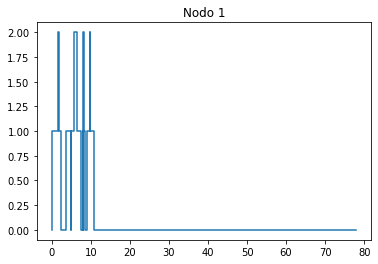

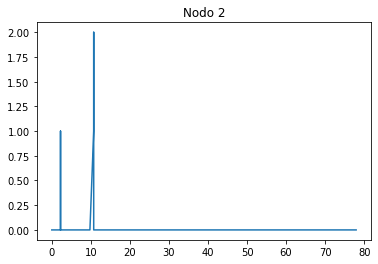

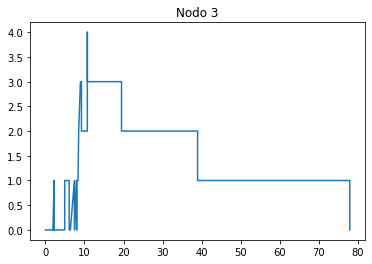

Numero de simulaciones realizadas: 20
Tiempo promedio del servicio despues del cierre 7535.946148251901
Tiempo promedio de simulacion 7545.929752391023
Tiempo promedio medio del sistema 951.3411338622825


In [75]:
import random
import math
import matplotlib.pyplot as plt

# Genera una variable aleatoria con una distribución uniforme.
def get_random_number():

    return random.random()

# Genera una variable aleatoria con una distribución exponencial.
def get_exponential(lambda_parameter):
    
    random_number = get_random_number()
    value = - (math.log(1 - random_number) / float(lambda_parameter))
    return value

# Genera una variable aleatoria con una distribución normal
def get_normal():
    
    random_number = get_random_number()
    square_root = math.sqrt(-2 * math.log1p(random_number - 1))
    sin = math.sin(2 * math.pi * random_number)
    value = square_root * sin
    if(value < 0):
        value = 0
    return value

#Llega del cliente
def client_arrival(actual_simulated_time):

    global mean_of_clients
    global number_of_clients
    global number_of_arrivals
    global arrivals
    global time
    global lambda_parameter
    global max_service_time
    global main_times
    global clients, times
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    mean_of_clients['node 1'] += number_of_clients['node 1'] * (actual_simulated_time - time)
    number_of_clients['node 1'] += 1
    number_of_arrivals['node 1'] += 1
    arrivals['node 1'].append(actual_simulated_time)
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    time = actual_simulated_time
    new_simulated_time = get_exponential(lambda_parameter)
    
    if(time + new_simulated_time < max_service_time):
        main_times['arrival times'] = time + new_simulated_time
    if(number_of_clients['node 1'] == 1):
        simulated_service_time = get_normal()
        main_times['service node 1'] = time + simulated_service_time
        
# Atiende al cliente que esté en el nodo 1 y lo envia para el nodo 2 o 3 según
# la probabilidad asociada a estos.       
def server_node_1(actual_simulated_time):

    global mean_of_clients
    global number_of_clients
    global time
    global number_of_departures
    global departures
    global number_of_arrivals
    global arrivals
    global main_times
    global clients, times
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    mean_of_clients['node 1'] += number_of_clients['node 1'] * (actual_simulated_time - time)
    number_of_clients['node 1'] -= 1
    number_of_departures['node 1'] += 1
    departures['node 1'].append(actual_simulated_time)
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    random_number = get_random_number()
    if(random_number < 0.4):
        mean_of_clients['node 2'] += number_of_clients['node 2'] * (actual_simulated_time - time)
        number_of_clients['node 2'] += 1
        number_of_arrivals['node 2'] += 1
        arrivals['node 2'].append(actual_simulated_time)
        if(number_of_clients['node 2'] == 1):
            new_simulated_time = get_exponential(lambda_parameter)
            main_times['service node 2'] = actual_simulated_time + new_simulated_time
    else:
        mean_of_clients['node 3'] += number_of_clients['node 3'] * (actual_simulated_time - time)
        number_of_clients['node 3'] += 1
        number_of_arrivals['node 3'] += 1
        arrivals['node 3'].append(actual_simulated_time)
        if(number_of_clients['node 3'] == 1):
            simulated_service_time = get_normal()
            main_times['service node 3'] = actual_simulated_time + simulated_service_time
    
    time = actual_simulated_time
    if(number_of_clients['node 1'] > 0):
        simulated_service_time = get_normal()
        main_times['service node 1'] = time + simulated_service_time
        
# Atiende al cliente que está en el nodo 2 y lo envía para el nodo 3.       
def server_node_2(actual_simulated_time):
    
    global mean_of_clients
    global number_of_clients
    global time
    global number_of_departures
    global departures
    global number_of_arrivals
    global arrivals
    global main_times
    global clients, times
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    mean_of_clients['node 2'] += number_of_clients['node 2'] * (actual_simulated_time - time)
    number_of_clients['node 2'] -= 1
    number_of_departures['node 2'] += 1
    departures['node 2'].append(actual_simulated_time)
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    if(number_of_clients['node 2'] > 0):
        new_simulated_time = get_exponential(lambda_parameter)
        main_times['service node 2'] = actual_simulated_time + new_simulated_time
        
    mean_of_clients['node 3'] += number_of_clients['node 3'] * (actual_simulated_time - time)
    number_of_clients['node 3'] += 1
    number_of_arrivals['node 3'] += 1
    arrivals['node 3'].append(actual_simulated_time)
    if(number_of_clients['node 3'] == 1):
        simulated_service_time = get_normal()
        main_times['service node 3'] = actual_simulated_time + simulated_service_time

# Atiende al cliente que está en el nodo 3 y termina el proceso.     
def server_node_3(actual_simulated_time):
  
    global mean_of_clients
    global number_of_clients
    global time
    global number_of_departures
    global departures
    global number_of_arrivals
    global arrivals
    global main_times
    global clients, times
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    mean_of_clients['node 3'] += number_of_clients['node 3'] * (actual_simulated_time - time)
    number_of_clients['node 3'] -= 1
    number_of_departures['node 3'] += 1
    departures['node 3'].append(actual_simulated_time)
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    if(number_of_clients['node 3'] > 0):
        if(number_of_clients['node 3'] < 5):
            simulated_service_time = get_normal()
        else:
            simulated_service_time = get_normal()
        
        main_times['service node 3'] = actual_simulated_time + new_simulated_time
        
    time = actual_simulated_time

number_of_simulations = 20
simulation_times = []
times_after_close = []
mean_system_times = []

for i in range(number_of_simulations):
    M = 99999999999 #Un numero grande
    time = 0
    time_after_last_client = 0
    actual_simulation_time = 0
    max_service_time = 10
    
    clients = { # Eje Y
        'node 1': [0],
        'node 2': [0],
        'node 3': [0]
    }
    times = { # Eje X
        'node 1': [0],
        'node 2': [0],
        'node 3': [0]
    }

    main_times = {
        'arrival times': M,
        'service node 1': M,
        'service node 2': M,
        'service node 3': M
    }

    number_of_arrivals = {
        'node 1': 0,
        'node 2': 0,
        'node 3': 0
    }
    number_of_departures = {
        'node 1': 0,
        'node 2': 0,
        'node 3': 0
    }
    number_of_clients = {
        'node 1': 0,
        'node 2': 0,
        'node 3': 0
    }

    arrivals = {
        'node 1': [],
        'node 2': [],
        'node 3': []
    }
    departures = {
        'node 1': [],
        'node 2': [],
        'node 3': []
    }

    mean_of_clients = {
        'node 1': 0,
        'node 2': 0,
        'node 3': 0
    }

    mean_system_time = 0
    lambda_parameter = 1


    actual_simulated_time = get_exponential(lambda_parameter)

    if(actual_simulated_time > max_service_time):
        time_after_last_client = 0
        mean_system_time = 0
        mean_of_clients['node 1'] = 0
        mean_of_clients['node 2'] = 0
        mean_of_clients['node 3'] = 0
    else:
        client_arrival(actual_simulated_time)
        counter = 0
        while(main_times['arrival times'] != M
              or main_times['service node 1'] != M
              or main_times['service node 2'] != M
              or main_times['service node 3'] != M):
                
            if(min(main_times, key=lambda x: main_times[x]) == 'arrival times'):
                new_simulated_time = main_times['arrival times']
                main_times['arrival times'] = M
                client_arrival(new_simulated_time)
            if(min(main_times, key=lambda x: main_times[x]) == 'service node 1'):
                new_simulated_time = main_times['service node 1']
                main_times['service node 1'] = M
                server_node_1(new_simulated_time)
            if(min(main_times, key=lambda x: main_times[x]) == 'service node 2'):
                new_simulated_time = main_times['service node 2']
                main_times['service node 2'] = M
                server_node_2(new_simulated_time)
            if(min(main_times, key=lambda x: main_times[x]) == 'service node 3'):
                new_simulated_time = main_times['service node 3']
                main_times['service node 3'] = M
                server_node_3(new_simulated_time)

        time_after_last_client = max(0, time - max_service_time)
        accumulated_1 = 0
        accumulated_2 = 0
        accumulated_3 = 0

        counter = 0
        while(counter < number_of_arrivals['node 1']):
            accumulated_1 += departures['node 1'][counter] - arrivals['node 1'][counter]
            counter += 1

        counter = 0
        while(counter < number_of_arrivals['node 2']):
            accumulated_2 += departures['node 2'][counter] - arrivals['node 2'][counter]
            counter += 1

        counter = 0
        while(counter < number_of_arrivals['node 3']):
            accumulated_3 += departures['node 3'][counter] - arrivals['node 3'][counter]
            counter += 1

        try:
            mean_system_time = ((accumulated_1  / number_of_arrivals['node 1'])
                    + (0.4 * accumulated_2  / number_of_arrivals['node 2']) 
                    + (accumulated_3  / number_of_arrivals['node 3']))
        except Exception:
            pass
        

        mean_of_clients['node 1'] /= time
        mean_of_clients['node 2'] /= time
        mean_of_clients['node 3'] /= time
        
        mean_system_times.append(mean_system_time)
        simulation_times.append(time)
        times_after_close.append(time_after_last_client)

plt.plot(times['node 1'], clients['node 1'])
plt.title('Nodo 1')
plt.show()
plt.plot(times['node 2'], clients['node 2'])
plt.title('Nodo 2')
plt.show()
plt.plot(times['node 3'], clients['node 3'])
plt.title('Nodo 3')
plt.show()

print("Numero de simulaciones realizadas: {}".format(len(simulation_times)))
print("Tiempo promedio del servicio despues del cierre {}".format(sum(times_after_close) / len(times_after_close)))
print("Tiempo promedio de simulacion {}".format(sum(simulation_times) / len(simulation_times)))
print("Tiempo promedio medio del sistema {}".format(sum(mean_system_times) / len(mean_system_times)))

##2.
Implementar en Notebook Jupyter los siguientes ejemplos de SimPy:

a) <a href="https://simpy.readthedocs.io/en/latest/examples/latency.html">Event Latency</a>

b) <a href="https://simpy.readthedocs.io/en/latest/examples/process_communication.html">Process Communication</a>

c) <a href="https://simpy.readthedocs.io/en/latest/examples/carwash.html">Carwash</a>

d) <a href="https://simpy.readthedocs.io/en/latest/examples/gas_station_refuel.html">Gas Station Refueling</a>

e) <a href="https://simpy.readthedocs.io/en/latest/examples/movie_renege.html">Movie Renege</a>

f) <a href="https://simpy.readthedocs.io/en/latest/examples/machine_shop.html">Machine Shop</a>

In [15]:
#Ejercicio A
!pip install simpy
SIM_DURATION = 100

class Cable(object):
    "Esta clase representa la propagación a través de un cable."
    def __init__(self, env, delay):
        self.env = env
        self.delay = delay
        self.store = simpy.Store(env)

    def latency(self, value):
        yield self.env.timeout(self.delay)
        self.store.put(value)

    def put(self, value):
        self.env.process(self.latency(value))

    def get(self):
        return self.store.get()


def sender(env, cable):
    "Un proceso que genera mensajes aleatoriamente."
    while True:
        # esperar la próxima transmisión
        yield env.timeout(5)
        cable.put('Sender sent this at %d' % env.now)


def receiver(env, cable):
    "Un proceso que consume mensajes."
    while True:
        # Obtener evento para canalización de mensajes
        msg = yield cable.get()
        print('Recibí esto de %d mientras %s' % (env.now, msg))


# Configurar e iniciar la simulación
print('Latencia del evento')
env = simpy.Environment()

cable = Cable(env, 10)
env.process(sender(env, cable))
env.process(receiver(env, cable))

env.run(until=SIM_DURATION)


Latencia del evento
Recibí esto de 15 mientras Sender sent this at 5
Recibí esto de 20 mientras Sender sent this at 10
Recibí esto de 25 mientras Sender sent this at 15
Recibí esto de 30 mientras Sender sent this at 20
Recibí esto de 35 mientras Sender sent this at 25
Recibí esto de 40 mientras Sender sent this at 30
Recibí esto de 45 mientras Sender sent this at 35
Recibí esto de 50 mientras Sender sent this at 40
Recibí esto de 55 mientras Sender sent this at 45
Recibí esto de 60 mientras Sender sent this at 50
Recibí esto de 65 mientras Sender sent this at 55
Recibí esto de 70 mientras Sender sent this at 60
Recibí esto de 75 mientras Sender sent this at 65
Recibí esto de 80 mientras Sender sent this at 70
Recibí esto de 85 mientras Sender sent this at 75
Recibí esto de 90 mientras Sender sent this at 80
Recibí esto de 95 mientras Sender sent this at 85


In [26]:
# Ejercicio B
import random
import simpy

RANDOM_SEED = 42
SIM_TIME = 100

class BroadcastPipe(object):
  
    def __init__(self, env, capacity=simpy.core.Infinity):
        self.env = env
        self.capacity = capacity
        self.pipes = []

    def put(self, value):
        "Transmite un * valor * a todos los receptores"
        if not self.pipes:
            raise RuntimeError('No hay tubos de salida.')
        events = [store.put(value) for store in self.pipes]
        return self.env.all_of(events)  # Acondicionamiento de eventos para todos los "eventos"

    def get_output_conn(self):
        """Obtener una nueva conexión de salida para esta tubería de transmisión.

         El valor de retorno es a: class: `~ simpy.resources.store.Store`.
        """
        pipe = simpy.Store(self.env, capacity=self.capacity)
        self.pipes.append(pipe)
        return pipe


def message_generator(name, env, out_pipe):
    "Un proceso que genera mensajes aleatoriamente."
    while True:
        # esperar la próxima transmisión
        yield env.timeout(random.randint(6, 10))

         # mensajes tienen marca de tiempo para verificar más tarde si el consumidor fue
         # tarde para conseguirlos. Tenga en cuenta que el uso de event.triggered para hacer esto puede
         # resultar en fallas debido a la naturaleza FIFO de los rendimientos de la simulación.
         # (es decir, si está en el mismo entorno ahora, message_generator pone un mensaje
         # en la tubería primero y luego message_consumer obtiene de la tubería,
         # the event.triggered será True en el otro orden en que será
         # Falso
        msg = (env.now, '%s dice hola a %d' % (name, env.now))
        out_pipe.put(msg)


def message_consumer(name, env, in_pipe):
    "Un proceso que consume mensajes."
    while True:
        # Obtener evento para canalización de mensajes
        msg = yield in_pipe.get()

        if msg[0] < env.now:
             # si el mensaje ya se colocó en la tubería, entonces
             # message_consumer llegó tarde. Dependiendo de qué
             # se está modelando esto, puede o no tener algunos
             # significado
            print('Mensaje de recepción TARDE: a la hora %d: %s mensaje recibido %s' %
                  (env.now, name, msg[1]))

        else:
            # message_consumer está sincronizado con message_generator
            print('en el momento %d: %s mensaje recibido: %s.' %
                  (env.now, name, msg[1]))

        # El proceso realiza algún otro trabajo, lo que puede resultar en mensajes perdidos
        yield env.timeout(random.randint(4, 8))


#  Configurar e iniciar la simulación
print('Comunicación de proceso')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Para tuberías de tipo uno a uno o varios a uno, use Store
pipe = simpy.Store(env)
env.process(message_generator('Generador A', env, pipe))
env.process(message_consumer('Consumidor A', env, pipe))

print('\nComunicación de tubería uno a uno\n')
env.run(until=SIM_TIME)

# Para uno a muchos, use BroadcastPipe
# (Nota: también se puede usar para uno a uno, muchos a uno o muchos a muchos)
env = simpy.Environment()
bc_pipe = BroadcastPipe(env)

env.process(message_generator('Generador A', env, bc_pipe))
env.process(message_consumer('Consumido A', env, bc_pipe.get_output_conn()))
env.process(message_consumer('Consumido B', env, bc_pipe.get_output_conn()))

print('\nComunicación de canalización de uno a varios\n')
env.run(until=SIM_TIME)

Comunicación de proceso

Comunicación de tubería uno a uno

en el momento 6: Consumidor A mensaje recibido: Generador A dice hola a 6.
en el momento 12: Consumidor A mensaje recibido: Generador A dice hola a 12.
en el momento 19: Consumidor A mensaje recibido: Generador A dice hola a 19.
en el momento 26: Consumidor A mensaje recibido: Generador A dice hola a 26.
en el momento 36: Consumidor A mensaje recibido: Generador A dice hola a 36.
en el momento 46: Consumidor A mensaje recibido: Generador A dice hola a 46.
en el momento 52: Consumidor A mensaje recibido: Generador A dice hola a 52.
en el momento 58: Consumidor A mensaje recibido: Generador A dice hola a 58.
Mensaje de recepción TARDE: a la hora 66: Consumidor A mensaje recibido Generador A dice hola a 65
en el momento 75: Consumidor A mensaje recibido: Generador A dice hola a 75.
en el momento 85: Consumidor A mensaje recibido: Generador A dice hola a 85.
en el momento 95: Consumidor A mensaje recibido: Generador A dice hola a 

In [32]:
# Ejercicio C
import random
import simpy

RANDOM_SEED = 42
NUM_MACHINES = 2  # Número de máquinas en el túnel de lavado
WASHTIME = 5      # Minutos necesarios para limpiar un coche
T_INTER = 7       # Crea un coche cada ~ 7 minutos
SIM_TIME = 20     # Tiempo de simulación en minutos


class Carwash(object):
    """Un túnel de lavado tiene un número limitado de máquinas (` `NUM_MACHINES``) para
     Limpiar coches en paralelo.

     Los coches tienen que solicitar una de las máquinas. Cuando consiguieron uno, ellos
     puede iniciar los procesos de lavado y esperar a que finalice (que
     toma minutos de `` tiempo de lavado '').

     """
    def __init__(self, env, num_machines, washtime):
        self.env = env
        self.machine = simpy.Resource(env, num_machines)
        self.washtime = washtime

    def wash(self, car):
        """Los procesos de lavado. Se necesita un` `coche`` procesa y prueba
         para limpiarlo. """
        yield self.env.timeout(WASHTIME)
        print("Lavado de auto eliminado %d%% de %s's sucio." %
              (random.randint(50, 99), car))


def car(env, name, cw):
    """El proceso del auto (cada auto tiene un` `nombre '') llega al lavado de autos
     (`` cw '') y solicita una máquina de limpieza.

     Luego inicia el proceso de lavado, espera a que termine y
     se va para no volver nunca ...

     """
    print('%s llega al lavado de autos en %.2f.' % (name, env.now))
    with cw.machine.request() as request:
        yield request

        print('%s entra en el lavado de autos en %.2f.' % (name, env.now))
        yield env.process(cw.wash(name))

        print('%s deja el lavado de autos en %.2f.' % (name, env.now))


def setup(env, num_machines, washtime, t_inter):
    """Crea un lavado de autos, varios autos iniciales y sigue creando autos
     aprox. cada `` t_inter`` minutos. """
    # Crea el lavado de autos
    carwash = Carwash(env, num_machines, washtime)

    # Crea 4 coches iniciales
    for i in range(4):
        env.process(car(env, 'Car %d' % i, carwash))

    # Crea más coches mientras se ejecuta la simulación
    while True:
        yield env.timeout(random.randint(t_inter - 2, t_inter + 2))
        i += 1
        env.process(car(env, 'Automovil %d' % i, carwash))


# Configurar e iniciar la simulación
print('Autolavado')
random.seed(RANDOM_SEED)  # Esto ayuda a reproducir los resultados.

# Cree un entorno e inicie el proceso de configuración
env = simpy.Environment()
env.process(setup(env, NUM_MACHINES, WASHTIME, T_INTER))

env.run(until=SIM_TIME)

Autolavado
Car 0 llega al lavado de autos en 0.00.
Car 1 llega al lavado de autos en 0.00.
Car 2 llega al lavado de autos en 0.00.
Car 3 llega al lavado de autos en 0.00.
Car 0 entra en el lavado de autos en 0.00.
Car 1 entra en el lavado de autos en 0.00.
Automovil 4 llega al lavado de autos en 5.00.
Lavado de auto eliminado 97% de Car 0's sucio.
Lavado de auto eliminado 67% de Car 1's sucio.
Car 0 deja el lavado de autos en 5.00.
Car 1 deja el lavado de autos en 5.00.
Car 2 entra en el lavado de autos en 5.00.
Car 3 entra en el lavado de autos en 5.00.
Automovil 5 llega al lavado de autos en 10.00.
Lavado de auto eliminado 64% de Car 2's sucio.
Lavado de auto eliminado 58% de Car 3's sucio.
Car 2 deja el lavado de autos en 10.00.
Car 3 deja el lavado de autos en 10.00.
Automovil 4 entra en el lavado de autos en 10.00.
Automovil 5 entra en el lavado de autos en 10.00.
Lavado de auto eliminado 97% de Automovil 4's sucio.
Lavado de auto eliminado 56% de Automovil 5's sucio.
Automovil 4 

In [38]:
# Ejercicio D
import itertools
import random
import simpy

RANDOM_SEED = 42
GAS_STATION_SIZE = 200     # litros
THRESHOLD = 10             # Umbral para llamar al camión cisterna (en%)
FUEL_TANK_SIZE = 50        # litros
FUEL_TANK_LEVEL = [5, 25]  # Niveles mínimos / máximos de los tanques de combustible (en litros)
REFUELING_SPEED = 2        # litros / segundo
TANK_TRUCK_TIME = 300      # Segundos que tarda el camión cisterna en llegar
T_INTER = [30, 300]        # Crea un coche cada [min, max] segundos
SIM_TIME = 1000            # Tiempo de simulación en segundos


def car(name, env, gas_station, fuel_pump):
    """Un coche llega a la gasolinera para repostar.

     Solicita una de las bombas de combustible de la gasolinera e intenta conseguir el
     cantidad deseada de gas. Si el embalse de las estaciones es
     agotado, el coche tiene que esperar a que llegue el camión cisterna.

     """
    fuel_tank_level = random.randint(*FUEL_TANK_LEVEL)
    print('%s llegando a la gasolinera en %.1f' % (name, env.now))
    with gas_station.request() as req:
        start = env.now
        # Solicita una de las bombas de gasolina
        yield req

        # Obtenga la cantidad requerida de combustible
        liters_required = FUEL_TANK_SIZE - fuel_tank_level
        yield fuel_pump.get(liters_required)

        # El proceso de repostaje "real" lleva algo de tiempo.
        yield env.timeout(liters_required / REFUELING_SPEED)

        print('%s terminado de repostar en %.1f segundos.' % (name,
                                                          env.now - start))


def gas_station_control(env, fuel_pump):
    """Compruebe periódicamente el nivel de * fuel_pump * y llame al tanque
     camión si el nivel cae por debajo de un umbral. """
    while True:
        if fuel_pump.level / fuel_pump.capacity * 100 < THRESHOLD:
            # ¡Necesitamos llamar al camión cisterna ahora!
            print('Llamar al camión cisterna al %d' % env.now)
            # Espere a que llegue el camión cisterna y reabastezca la estación.
            yield env.process(tank_truck(env, fuel_pump))

        yield env.timeout(10)  # Verifique cada 10 segundos


def tank_truck(env, fuel_pump):
    """Llega a la gasolinera después de un cierto retraso y la reposta."""
    yield env.timeout(TANK_TRUCK_TIME)
    print('Camión cisterna llegando a la hora %d' % env.now)
    ammount = fuel_pump.capacity - fuel_pump.level
    print('Reabastecimiento de combustible de camiones cisterna %.1f litros.' % ammount)
    yield fuel_pump.put(ammount)


def car_generator(env, gas_station, fuel_pump):
    """Generar coches nuevos que lleguen a la gasolinera"""
    for i in itertools.count():
        yield env.timeout(random.randint(*T_INTER))
        env.process(car('Automovil %d' % i, env, gas_station, fuel_pump))


# Configurar e iniciar la simulación
print('Repostaje de gasolineras')
random.seed(RANDOM_SEED)

# Crear entorno e iniciar procesos
env = simpy.Environment()
gas_station = simpy.Resource(env, 2)
fuel_pump = simpy.Container(env, GAS_STATION_SIZE, init=GAS_STATION_SIZE)
env.process(gas_station_control(env, fuel_pump))
env.process(car_generator(env, gas_station, fuel_pump))

env.run(until=SIM_TIME)

Repostaje de gasolineras
Automovil 0 llegando a la gasolinera en 87.0
Automovil 0 terminado de repostar en 18.5 segundos.
Automovil 1 llegando a la gasolinera en 129.0
Automovil 1 terminado de repostar en 19.0 segundos.
Automovil 2 llegando a la gasolinera en 284.0
Automovil 2 terminado de repostar en 21.0 segundos.
Automovil 3 llegando a la gasolinera en 385.0
Automovil 3 terminado de repostar en 13.5 segundos.
Automovil 4 llegando a la gasolinera en 459.0
Llamar al camión cisterna al 460
Automovil 4 terminado de repostar en 22.0 segundos.
Automovil 5 llegando a la gasolinera en 705.0
Automovil 6 llegando a la gasolinera en 750.0
Camión cisterna llegando a la hora 760
Reabastecimiento de combustible de camiones cisterna 188.0 litros.
Automovil 6 terminado de repostar en 29.0 segundos.
Automovil 5 terminado de repostar en 76.5 segundos.
Automovil 7 llegando a la gasolinera en 891.0
Automovil 7 terminado de repostar en 13.0 segundos.


In [48]:
# Ejercicio E
import collections
import random
import simpy

RANDOM_SEED = 42
TICKETS = 50  # Número de entradas por película
SIM_TIME = 200  # Simular hasta


def moviegoer(env, movie, num_tickets, theater):
    """Un cinéfilo intenta conseguir un número de entradas (* num_tickets *) para
     cierta * película * en un * cine *.

     Si la película se agota, deja el cine. Si ella consigue
     al mostrador, intenta comprar varios billetes. Si no es suficiente
     quedan billetes, discute con el cajero y se va.

     Si queda como máximo una entrada después de que el espectador la compró
     entradas, el evento * agotado * para esta película se activa y provoca
     todos los espectadores restantes se vayan.

     """
    with theater.counter.request() as my_turn:
        # Espera hasta que sea nuestro turno o hasta que se agote la película
        result = yield my_turn | theater.sold_out[movie]

        # Comprueba si es nuestro turno o si la película está agotada
        if my_turn not in result:
            theater.num_renegers[movie] += 1
            return

        # Compruebe si quedan suficientes entradas.
        if theater.available[movie] < num_tickets:
            # El espectador se va después de una discusión
            yield env.timeout(0.5)
            return

        # Comprar boletos
        theater.available[movie] -= num_tickets
        if theater.available[movie] < 2:
            # Activa el evento "agotado" para la película
            theater.sold_out[movie].succeed()
            theater.when_sold_out[movie] = env.now
            theater.available[movie] = 0
        yield env.timeout(1)


def customer_arrivals(env, theater):
    """Crea nuevos * espectadores * hasta que el tiempo de simulación llegue a 200."""
    while True:
        yield env.timeout(random.expovariate(1 / 0.5))

        movie = random.choice(theater.movies)
        num_tickets = random.randint(1, 6)
        if theater.available[movie]:
            env.process(moviegoer(env, movie, num_tickets, theater))


Theater = collections.namedtuple('Theater', 'counter, movies, available, '
                                            'sold_out, when_sold_out, '
                                            'num_renegers')


# Configurar e iniciar la simulación
print('Renego de la película')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Crear sala de cine
counter = simpy.Resource(env, capacity=1)
movies = ['Python Unchained', 'Kill Process', 'Pulp Implementation']
available = {movie: TICKETS for movie in movies}
sold_out = {movie: env.event() for movie in movies}
when_sold_out = {movie: None for movie in movies}
num_renegers = {movie: 0 for movie in movies}
theater = Theater(counter, movies, available, sold_out, when_sold_out,
                  num_renegers)

# Iniciar proceso y ejecutar
env.process(customer_arrivals(env, theater))
env.run(until=SIM_TIME)

# Resultados de analisis
for movie in movies:
    if theater.sold_out[movie]:
        print('Pelicula "%s" agotado %.1f minutos después del mostrador de boletos '
              'Abriendo' % (movie, theater.when_sold_out[movie]))
        print('  Número de personas que abandonan la cola cuando se agota la película: %s' %
              theater.num_renegers[movie])

Renego de la película
Pelicula "Python Unchained" agotado 38.0 minutos después del mostrador de boletos Abriendo
  Número de personas que abandonan la cola cuando se agota la película: 16
Pelicula "Kill Process" agotado 43.0 minutos después del mostrador de boletos Abriendo
  Número de personas que abandonan la cola cuando se agota la película: 5
Pelicula "Pulp Implementation" agotado 28.0 minutos después del mostrador de boletos Abriendo
  Número de personas que abandonan la cola cuando se agota la película: 5


In [52]:
# Ejercicio F
import random
import simpy

RANDOM_SEED = 42
PT_MEAN = 10.0         # Promedio. tiempo de procesamiento en minutos
PT_SIGMA = 2.0         # Sigma de tiempo de procesamiento
MTTF = 300.0           # Tiempo medio de falla en minutos
BREAK_MEAN = 1 / MTTF  # Param. para distribución expovariable
REPAIR_TIME = 30.0     # Tiempo que lleva reparar una máquina en minutos
JOB_DURATION = 30.0    # Duración de otros trabajos en minutos
NUM_MACHINES = 10      # Número de máquinas en el taller de máquinas
WEEKS = 4              # Tiempo de simulación en semanas
SIM_TIME = WEEKS * 7 * 24 * 60  # Tiempo de simulación en minutos


def time_per_part():
    """Devuelve el tiempo de procesamiento real de una pieza de hormigón."""
    return random.normalvariate(PT_MEAN, PT_SIGMA)


def time_to_failure():
    """Tiempo de retorno hasta la próxima falla de una máquina."""
    return random.expovariate(BREAK_MEAN)


class Machine(object):
    """Una máquina produce piezas y me rompen de vez en cuando.

     Si se rompe, solicita un * reparador * y continúa la producción.
     después de la reparación.

     Una máquina tiene un * nombre * y un número de * piezas_fabricadas * hasta ahora.

     """
    def __init__(self, env, name, repairman):
        self.env = env
        self.name = name
        self.parts_made = 0
        self.broken = False

        # Inicie los procesos de "trabajo" y "break_machine" para esta máquina.
        self.process = env.process(self.working(repairman))
        env.process(self.break_machine())

    def working(self, repairman):
        """Producir piezas siempre que se ejecute la simulación.

         Al fabricar una pieza, la máquina puede romperse varias veces.
         Solicite un reparador cuando esto suceda.

         """
        while True:
            # Empiece a hacer una pieza nueva
            done_in = time_per_part()
            while done_in:
                try:
                    # Trabajando en la pieza
                    start = self.env.now
                    yield self.env.timeout(done_in)
                    done_in = 0  # Ajústelo a 0 para salir del ciclo while.

                except simpy.Interrupt:
                    self.broken = True
                    done_in -= self.env.now - start  # How much time left?

                    # Solicite un reparador. Esto sustituirá a su "otro_trabajo".
                    with repairman.request(priority=1) as req:
                        yield req
                        yield self.env.timeout(REPAIR_TIME)

                    self.broken = False

            # Parte está hecha.
            self.parts_made += 1

    def break_machine(self):
        """Romper la máquina de vez en cuando"""
        while True:
            yield self.env.timeout(time_to_failure())
            if not self.broken:
                # Solo rompa la máquina si está funcionando actualmente.
                self.process.interrupt()


def other_jobs(env, repairman):
    """El otro trabajo (sin importancia) del reparador."""
    while True:
        # Empezar un nuevo trabajo
        done_in = JOB_DURATION
        while done_in:
            # Vuelva a intentar el trabajo hasta que esté listo.
            # Su prioridad es menor que la de las reparaciones de máquinas.
            with repairman.request(priority=2) as req:
                yield req
                try:
                    start = env.now
                    yield env.timeout(done_in)
                    done_in = 0
                except simpy.Interrupt:
                    done_in -= env.now - start


# Configurar e iniciar la simulación
print('Tienda de máquinas')
random.seed(RANDOM_SEED)  # Esto ayuda a reproducir los resultados.

# Cree un entorno e inicie el proceso de configuración
env = simpy.Environment()
repairman = simpy.PreemptiveResource(env, capacity=1)
machines = [Machine(env, 'Maquina %d' % i, repairman)
            for i in range(NUM_MACHINES)]
env.process(other_jobs(env, repairman))

env.run(until=SIM_TIME)

print('Resultados del taller de máquinas después %s semanas' % WEEKS)
for machine in machines:
    print('%s hecho %d partes.' % (machine.name, machine.parts_made))

Tienda de máquinas
Resultados del taller de máquinas después 4 semanas
Maquina 0 hecho 3251 partes.
Maquina 1 hecho 3273 partes.
Maquina 2 hecho 3242 partes.
Maquina 3 hecho 3343 partes.
Maquina 4 hecho 3387 partes.
Maquina 5 hecho 3244 partes.
Maquina 6 hecho 3269 partes.
Maquina 7 hecho 3185 partes.
Maquina 8 hecho 3302 partes.
Maquina 9 hecho 3279 partes.


##3.
Implementar una red de colas como la del punto 1 ([<a href="https://drive.google.com/file/d/0B0MRo23s_UhySlJVYU41QlBkaWs/view?usp=sharing">Sec. 5.5.2 Rios08 </a> ]) usando SimPy.

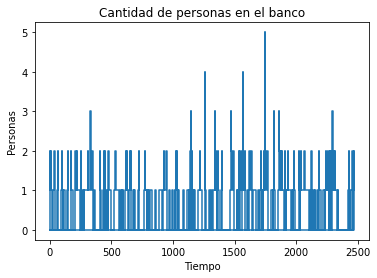

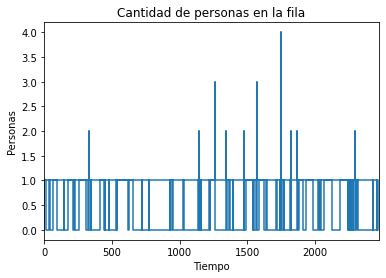

Cantidad de clientes que llegaron: 200
Cantidad de clientes que fueron atendidos en el banco: 119
Cantidad de clientes que abandonaron el banco: 81
Tiempo promedio de espera del cliente en la fila: 0.9393160976377318
Tiempo promedio del cliente en el banco: 0.01925727285919038
Tamaño promedio de la fila: 0.505


In [84]:
import matplotlib.pyplot as plt
import numpy as np
import random
import simpy
import math

NEW_CUSTOMERS = 200  # Número total de clientes
INTERVAL_CUSTOMERS = 0  # Tiempo entre clientes
MIN_PATIENCE = 0  # Paciencia minima
MAX_PATIENCE = 0  # Paciencia maxima
TIME_IN_BANK = 0

CLIENTES=0 #numero de clientes q han entrado al banco
ATENDIDOS=0 #cantidad de clientes atendidos
ABANDONAN=0 #clientes que han abandonado el banco por espera
tfila=0 #suma de tiempo de espera de los clientes en la fila
tbanco=0 #suma de tiempo q el cliente duro en el banco
Tfila=0 #suma de tamaño de fila
fila=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente de la fila
banco=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente del banco

SEED_U=24242 #semilla para distribucion uniforme
SEED_E=24242 #semilla para distribucion exponencial

def source(env, nclientes, interval, counter):
    #interval: media deseada del intervalo de tiempo entre la llegada de nuevos clientes
    #counter:  mostrador donde se atiende los clientes
    semilla=5 #semila para exponencial
    
    #Fuente genera clientes azar
    for i in range(nclientes):
        c = customer(env, 'Cliente%02d' % i, counter)
        env.process(c)
        semilla,t=exponencial(semilla,1.0 / interval)
        #t = random.expovariate(1.0 / interval)
        yield env.timeout(t)


def customer(env, name, counter):
    
    global ATENDIDOS,ABANDONAN,CLIENTES,tfila,tbanco,Tfila,SEED_U,SEED_E
    arrive = env.now
    
    CLIENTES+=1;
    banco[0].append(arrive)
    banco[1].append(CLIENTES-ATENDIDOS-ABANDONAN)
    if CLIENTES-ATENDIDOS-ABANDONAN > 1:
        fila[0].append(arrive)
        fila[1].append(CLIENTES-ATENDIDOS-ABANDONAN-1)
    
    with counter.request() as req:
        SEED_U,patience = uniforme(SEED_U,MIN_PATIENCE, MAX_PATIENCE)
        
        results = yield req | env.timeout(patience)
        
        Tfila +=CLIENTES-ATENDIDOS-ABANDONAN-1
        if CLIENTES-ATENDIDOS-ABANDONAN > 1:
            fila[0].append(env.now)
            fila[1].append(CLIENTES-ATENDIDOS-ABANDONAN-2)
        
        wait = env.now - arrive
        
        tfila+=wait
        
        if req in results:
            
            SEED_E,tib = exponencial(SEED_E,1.0 / TIME_IN_BANK)
            yield env.timeout(tib)
            ATENDIDOS+=1;
        else:
            ABANDONAN+=1
        tbanco=env.now-arrive
        banco[0].append(env.now)
        banco[1].append(CLIENTES- ATENDIDOS-ABANDONAN)
        
def random(x):
    a=1456723
    b=1276431929
    m=2**34
    x=(a*x+b)%m
    u=float(x)/m
    return u,x

def exponencial(x,landa):
    u,x = random(x)
    return x,-math.log(1-u)/landa

def uniforme(x,a,b):
    u,x = random(x)
    return x,a+u*(b-a)

def estadisticas():
    print('Cantidad de clientes que llegaron: '+str(CLIENTES))
    print('Cantidad de clientes que fueron atendidos en el banco: '+str(ATENDIDOS))
    print('Cantidad de clientes que abandonaron el banco: '+str(ABANDONAN))
    print('Tiempo promedio de espera del cliente en la fila: '+str(tfila/CLIENTES))
    print('Tiempo promedio del cliente en el banco: '+str(tbanco/CLIENTES))
    print('Tamaño promedio de la fila: '+str(Tfila/CLIENTES))

def grafica():
    #banco
    xb=np.repeat(banco[0],2).tolist()
    xb.append(0)
    tb=np.repeat(banco[1],2).tolist()
    tb.insert(0,0)
    
    plt.title('Cantidad de personas en el banco')
    plt.plot(xb,tb)
    plt.ylabel('Personas')
    plt.xlabel('Tiempo')
    plt.show()
    
    #fila
    xf=np.repeat(fila[0],2).tolist()
    xf.append(0)
    tf=np.repeat(fila[1],2).tolist()
    tf.insert(0,0)
    
    plt.plot(xf,tf)
    plt.title('Cantidad de personas en la fila')
    plt.xlim(0,max(banco[0]))
    plt.ylabel('Personas')
    plt.xlabel('Tiempo')
    plt.show()

INTERVAL_CUSTOMERS = 12.0
MIN_PATIENCE = 1
MAX_PATIENCE = 3
TIME_IN_BANK = 9.0

CLIENTES=0 #numero de clientes q han entrado al banco
ATENDIDOS=0 #cantidad de clientes atendidos
ABANDONAN=0 #clientes que han abandonado el banco por espera
tfila=0 #suma de tiempo de espera de los clientes en la fila
tbanco=0 #suma de tiempo q el cliente duro en el banco
Tfila=0 #suma de tamaño de fila
fila=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente de la fila
banco=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente del banco

SEED_U=24242
SEED_E=24242

env = simpy.Environment()
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

grafica()
estadisticas()